### Rosenbrock method for finding minimum
###### In this notebook I am going to present the operation of the Rosenbrock method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting the function
Given the target function, let's plot it to verify the possible minima locations

In [2]:
x1 = np.linspace(-1,1, 200)
x2 = np.linspace(-1,1, 200)
x1v, x2v = np.meshgrid(x1, x2)

def function(x1, x2): 
    return (x1**2 + x2**2 - np.cos(2.5*np.pi*x1) - np.cos(2.5*np.pi*x2) +2)

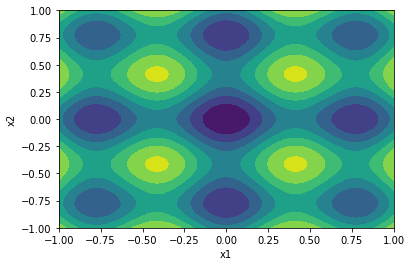

In [3]:
z = function(x1v, x2v)
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')

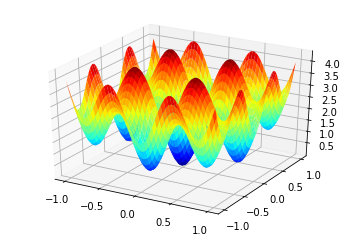

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1v,x2v,z, cmap=cm.jet)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

### Building modified Gramm - Schmidt orthonormalization procedure

The Rosenbrock method relies on the change of base if a certain condition is fullfilled. The new base is constructed using Gramm-Schmidt procedure, but with a minor modification, namely, to produce an orthonormal base we need two sets of linearly independent vectors, as opposed to one in classical version of the procedure, that are taken from operating variables of the Rosenbrock algorithm

In [5]:
def create_new_base(direction, lam):
    new_base = np.zeros(direction.shape)
    D = direction.transpose()
    M = lam.transpose()
    Q = np.dot(D, M) #is really matrix multiplication for 2D arrays
    v = np.zeros(direction.shape)
    v[0] = Q[:,0] #as in classical method, first vector is unchanged, only normalized
    new_base[0] = v[0]/np.sqrt(np.dot(v[0].transpose(), v[0]))
    for j in range(1, len(direction)):
        scalar_dir = np.zeros(len(Q[0,:]))
        for k in range(0, j): #here happens the summation of vectors
            p = np.dot(Q[:,j].transpose(), new_base[k, :])
            p = np.multiply(p, new_base[k, :])
            scalar_dir = np.add(scalar_dir,p)
        v[j] = np.subtract(Q[:,j] ,scalar_dir)
        new_base[j] = v[j]/np.sqrt(np.dot(v[j].transpose(), v[j]))
    return new_base

direction = np.array([[1,0], [0,1]])
lam = np.array([[1, -0.5], [0, -0.5]])

d = create_new_base(direction, lam)
print(d[0], d[1])

[ 0.89442719 -0.4472136 ] [-0.4472136  -0.89442719]


The above displays the correct operation of the change_base method. See that two vectors are indeed orthonormal

Let me rewrite the function that has been plotted before, so that it better suits the orthonormalization algorithm (numpy parsing)

In [6]:
def target_function(x):
    x1 = x[0]
    x2 = x[1]
    return (x1**2 + x2**2 - np.cos(2.5*np.pi*x1) - np.cos(2.5*np.pi*x2) +2)
def test_function(x): 
    #additional test function, that is easier and has only one global minimum
    x1 = x[0]
    x2 = x[1]
    return 2.5*(x1**2 -x2)**2 + (1 - x1)**2

Below is the code for actual rosenbrock method

In [7]:
def rosenbrock_method(function, x0, direction, s, alpha, beta, N, verbose):
    #alpha - expansion coefficient
    #beta - contraction coefficient
    lam = [0 for i in range(len(direction))] #success list for each direction
    p = [0 for i in range(len(direction))] #failure list for each direction
    i = 0
    x_base = x0
    x_list = []
    while i <= N:
        if verbose: 
            print("ITERATION NUMBER : {}".format(i))
            print("CURRENT MINUMUM : {}".format(x_base))
        for j in range(len(direction)):
            if verbose:
                print("\nCurrent value {}".format(function(x_base)))
                print("Value of next_step {}".\
                      format(function(np.add(x_base,np.multiply(direction[j],s[j])))))
            if function(np.add(x_base,np.multiply(direction[j],s[j]))) < function(x_base):
                #successful step
                if verbose: print("\nSuccess")
                x_base = np.add(x_base,np.multiply(direction[j],s[j]))
                x_list.append(x_base)
                lam[j] = np.add(lam[j],s[j])
                s[j] = np.multiply(alpha,s[j])
            elif function(np.add(x_base,np.multiply(direction[j],s[j]))) \
            >= function(x_base):
                if verbose: print("Failure\n")
                #failed step
                s[j] = (-1)*s[j]*beta
                p[j] = np.add(p[j],1)
            if verbose: print("State of success: {} \nState of failure: {} \nStep is: {}"\
                              .format(lam, p, s))
        for_all = 0
        if verbose: print("\nInvestigating failures and successes")
        for j in range(len(direction)):
            if verbose: print("Failure [{}] : {}, Success[{}] : {}".\
                              format(j, p[j], j, lam[j]))
            if p[j] !=0 and lam[j]!=0:
                for_all += 1
        if verbose: print("Directions for which there was a success and a failure : {}".\
                          format(for_all))
        if for_all == len(direction):
            if verbose: print("Change of base\n")
            l = np.zeros((2,2))
            l[0,0] = lam[0]
            l[1,0] = lam[1]
            l[1,1] = lam[1]
            if verbose: print("Triangular matrix: \n{}".format(l))
            direction = create_new_base(direction, l.transpose())  
            if verbose: print("New base is {}\n".format(direction))
            lam = [0 for i in range(len(direction))] #clear
            p = [0 for i in range(len(direction))] #clear
        i = i+1
        if verbose: print("####################################################")
    return x_base, x_list

### Testing the method

In [8]:
x0 = np.array([-0.5,1.0])
s = np.array([1.0,1.0])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minimum,_ = rosenbrock_method(test_function, x0, direction, s, 2, 0.5, 100, 0) 
#run with last argument as 1 to see verbose report

In [9]:
test_function(minimum)

1.3514586308982647e-11

The test function has indeed a minimum at x = (1,1), so it was verified that algorithm approaches the solution in that case

[  1.92707423e-09  -1.69716650e-09] 2.22044604925e-16


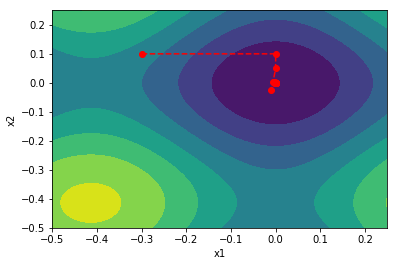

In [10]:
x0 = np.array([-0.4,0.1])
s = np.array([0.10,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minimum, xlist = rosenbrock_method(target_function, x0, direction, s\
                                   , 3, 0.5, 100, 0) 
print(minimum, target_function(minimum))


x1 = np.linspace(-0.5,0.25, 200)
x2 = np.linspace(-0.5,0.25, 200)
x1v, x2v = np.meshgrid(x1, x2)
z = function(x1v, x2v)
plt.contourf(x1v,x2v,z)
x1s = [point[0] for point in xlist]
x2s = [point[1] for point in xlist]
plt.plot(x1s,x2s, 'ro--')
plt.xlabel('x1')
plt.ylabel('x2')

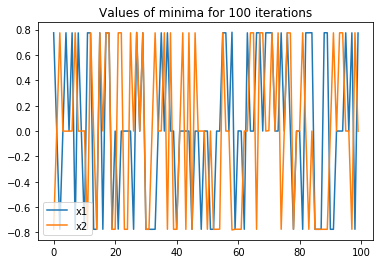

In [11]:
x_init = 2*np.random.random((100,2))-1 #draw x's in the specified interval
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minima = []
for xpair in x_init:
    p = rosenbrock_method(target_function, np.array(xpair), direction, s\
                          , 2, 0.5,30, 0)[0]
    minima.append(p)
plt.plot(minima)
plt.title("Values of minima for 100 iterations")
plt.legend(['x1', 'x2'])

It is apparent that multiple minima are found. Majority of them are local minima

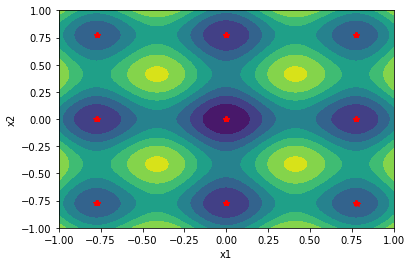

In [12]:
x1 = np.linspace(-1,1, 200)
x2 = np.linspace(-1,1, 200)
x1v, x2v = np.meshgrid(x1, x2)
z = function(x1v, x2v)
plt.contourf(x1v,x2v,z)
x1s = [point[0] for point in minima]
x2s = [point[1] for point in minima]
plt.plot(x1s, x2s, 'r*')
plt.xlabel('x1')
plt.ylabel('x2')

Because the local minima are treated as global one, mean square error is heavily dependent on the number of local minima

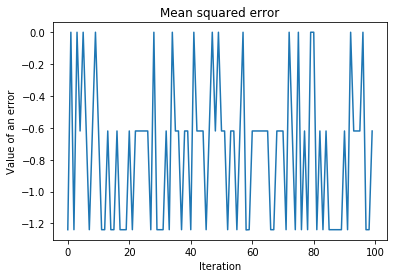

In [13]:
# minimum is at 0,0 so in this case there is no need to subtract
mse = []
value = 0
for minimum in minima:
    mse.append(value - target_function(minimum))
plt.plot(mse)
plt.xlabel('Iteration')
plt.ylabel('Value of an error')
plt.title("Mean squared error")


### Summary
1. The Rosenbrock method has to be run with an appropiate number of iterations, if the number is chosen to be too large, it might happen that even local minima are not found.
2. This method also has expected problems with local minima that might not be possible to overcome without additional imporvements or algorithm
3. The Rosenbrock method converges quite quickly, finding minimum effectively. Hovewer, the computation might be exhausting for large number of dimensions because of Gram-Schmitt orthonormalization

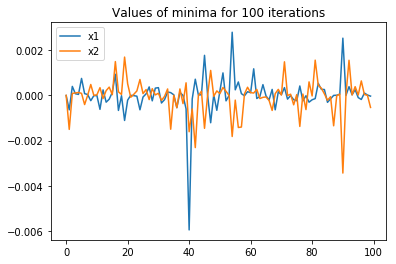

In [14]:
def target_function(x):
    x1 = x[0]
    x2 = x[1]
    return (-1)*np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
    
x_init = 2*np.random.random((100,2))-1 #draw x's in the specified interval
s = np.array([0.1,0.1])
direction = np.array([[1.0,0.0], [0.0,1.0]])
minima = []
for xpair in x_init:
    p = rosenbrock_method(target_function, np.array(xpair), direction, s\
                          , 2, 0.5,30, 0)[0]
    minima.append(p)
plt.plot(minima)
plt.title("Values of minima for 100 iterations")
plt.legend(['x1', 'x2'])

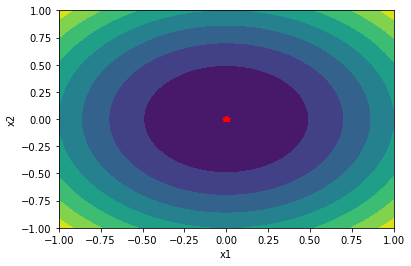

In [15]:
def function(x1, x2):
    return (-1)*np.sin(np.pi*(np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)))\
            /(np.pi*np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
x1 = np.linspace(-1,1, 200)
x2 = np.linspace(-1,1, 200)
x1v, x2v = np.meshgrid(x1, x2)
z = function(x1v, x2v)
plt.contourf(x1v,x2v,z)
x1s = [point[0] for point in minima]
x2s = [point[1] for point in minima]
plt.plot(x1s, x2s, 'r*')
plt.xlabel('x1')
plt.ylabel('x2')